*** from here, this is Meserat's code. i corrupted the file on the main branch by mistake and couldn't figure out how to merge this branch to the main

# Exploratory Data Analysis on SmartAd Data
## 1. Load Data

In [4]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics
import warnings
import seaborn as sns
import random as rd
import sys
sys.path.append('../Scripts')

#importing custom libraries
#from eda_Read_data import ReadData
from PlottingFunctions import PlottingFunctions
from VisualisationPlots import VisualiseDf
from DistributionPlots import  DistributionPlots

# to know which filepath to use to get to the source data
import os
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/.gitignore
../data/AdSmartABdata.csv.dvc


In [8]:
# load data

# loader = ReadData()
ad_df = pd.read_csv('../dataOLD/AdSmartABdata.csv')
ad_df.head()
# raw = pd.read_csv('../data/AdSmartABdata.csv')
# raw.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


## 2. Investigating the data
### 2.a

In [9]:
# Find missing values
ad_df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [10]:
ad_df.shape
# raw.shape

(8077, 9)

In [11]:
experiment_groups = ad_df.groupby('experiment')
exposed_group= experiment_groups.get_group('exposed')
exposed_group

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0
...,...,...,...,...,...,...,...,...,...
8065,ffbc02cb-628a-4de5-87fc-5d76b7d796e5,exposed,2020-07-09,17,Generic Smartphone,6,Chrome Mobile,0,0
8067,ffc594ef-756c-4d24-a310-0d8eb4e11eb7,exposed,2020-07-05,1,Samsung SM-G950F,6,Chrome Mobile WebView,0,0
8071,ffdfdc09-48c7-4bfb-80f8-ec1eb633602b,exposed,2020-07-03,4,Generic Smartphone,6,Chrome Mobile,0,1
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0


In [12]:
control_group= experiment_groups.get_group('control')
control_group

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
...,...,...,...,...,...,...,...,...,...
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1
8070,ffcea781-a6e7-4f98-9d90-f95377270476,control,2020-07-03,15,Samsung SM-N976B,6,Facebook,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0


# Cleaning data

In [13]:
# sys.path.append('../Scripts')
from eda_cleaning_data import Cleaning_excel_data

ModuleNotFoundError: No module named 'eda_cleaning_data'

In [14]:
cleaner = Cleaning_excel_data()
df= cleaner.drop_rows(ad_df, 'yes', 'no')

NameError: name 'Cleaning_excel_data' is not defined

In [12]:
df= cleaner.drop_rows(ad_df, 'yes', 'no')
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [13]:
df.shape

(1243, 9)

In [14]:
experiment_dropped_groups = df.groupby('experiment')
exposed_dropped_group= experiment_dropped_groups.get_group('exposed')
exposed_dropped_group.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,1
46,01905bae-fc59-475e-b2b4-09b78163c961,exposed,2020-07-05,6,I3312,6,Chrome Mobile WebView,0,1


In [15]:
control_dropped_group= experiment_dropped_groups.get_group('control')
control_dropped_group.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
48,01985992-d70b-4258-a3a1-60ac5e17bce6,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
62,023458f7-122d-475f-9525-1b9a3cc7a033,control,2020-07-03,15,MRD-LX1,6,Facebook,0,1


In [16]:
control_dropped_group.shape

(586, 9)

In [17]:
exposed_dropped_group.shape

(657, 9)

In [18]:
df1 = exposed_dropped_group.groupby('experiment').aggregate({'yes': 'sum', 
                                    'no': 'sum'
                                 }).reset_index()
df1 

,experiment,yes,no
0,exposed,308,349


In [19]:
df2 = control_dropped_group.groupby('experiment').aggregate({'yes': 'sum', 
                                                             'no': 'sum'
                                                            }).reset_index()
df2

,experiment,yes,no
0,control,264,322


# exploration on categorical columns

In [20]:
sys.path.append('../Scripts')
from eda_plot import Plot

In [21]:
ad_df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

<AxesSubplot:ylabel='experiment'>

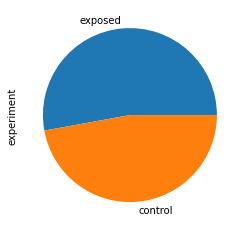

In [22]:
df ['experiment'].value_counts().plot(kind='pie')

# The distribution shows that the number of users in the exposed category were more than the control category


<AxesSubplot:ylabel='device_make'>

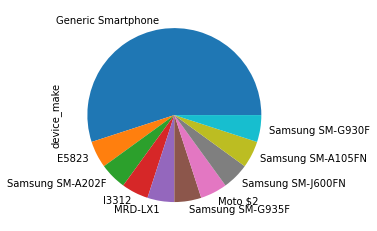

In [23]:
df['device_make'].head(20).value_counts().plot(kind='pie')

# Several different models of samsung phones were used but generic smartphones were the most frequent

<AxesSubplot:>

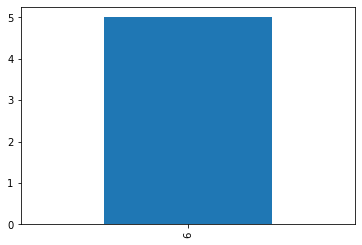

In [24]:
df['platform_os'].head().value_counts().plot(kind='bar')


# Most viewers of the ad were android users

<AxesSubplot:>

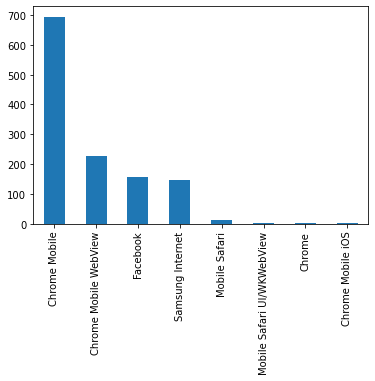

In [25]:
df['browser'].value_counts().plot(kind='bar')

# Checking data formats

In [26]:
df.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

# Grouping users by hour

<AxesSubplot:xlabel='hour,hour'>

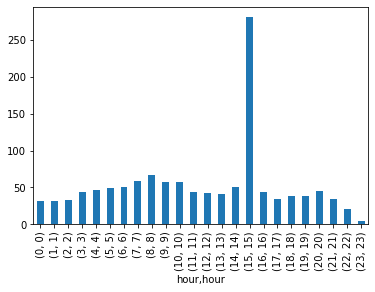

In [27]:
hour_groups = df.groupby('hour')
hour_groups['hour'].value_counts().plot(kind='bar')

# Grouping Users by day

<AxesSubplot:xlabel='date,date'>

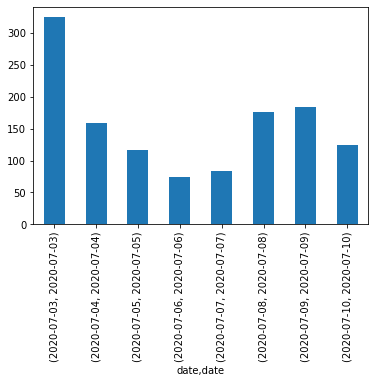

In [28]:
day_groups = df.groupby('date')
day_groups['date'].value_counts().plot(kind='bar')

# Bivariate Analysis
DATE VS HOUR PLOT

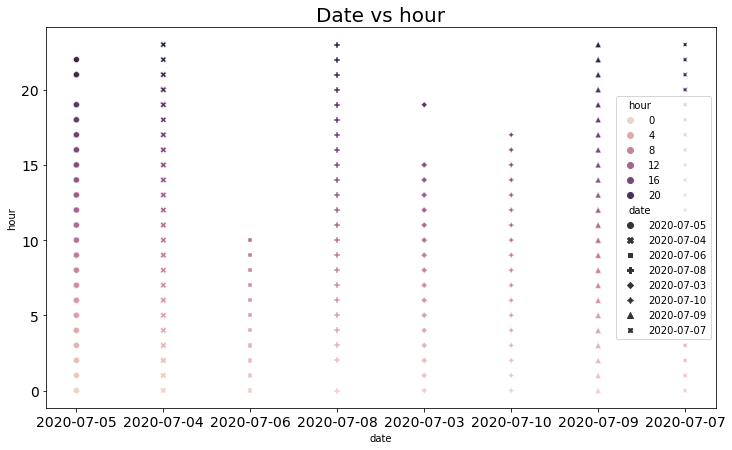

In [29]:
from eda_plot import Plot
plot = Plot()
plot.plot_scatter(df, 'date', 'hour', 'Date vs hour', 'hour','date')

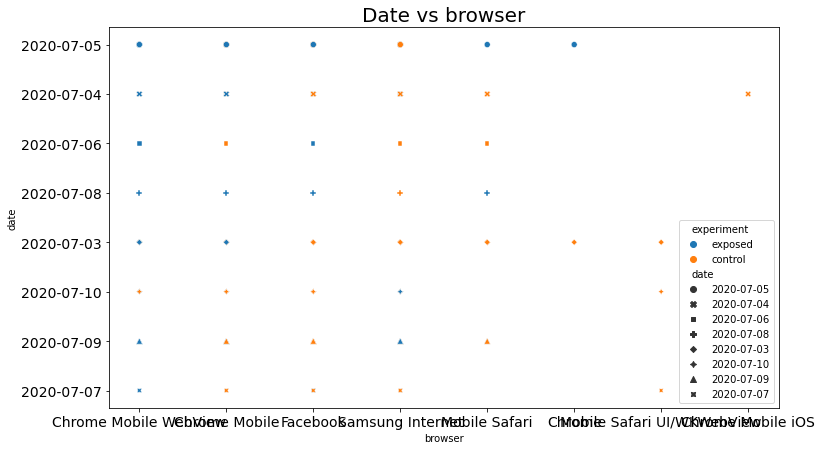

In [30]:
plot.plot_scatter(df, 'browser', 'date', 'Date vs browser', 'experiment','date')

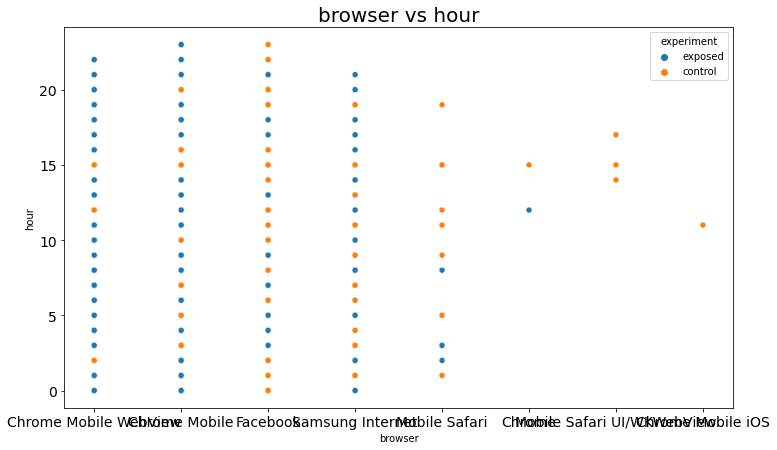

In [31]:
plot.plot_scatter(df, 'browser', 'hour', 'browser vs hour', 'experiment', None)


*** this is where Meserat's code ends

### 2.b.
### 2.1. Counting unique values of categorical variables

The categorical variables that we have in this dataframe are:
<br>
<li>'experiment'
<li>'platform_os'
<li>'yes'
<li>'no'

In [48]:
# count values of the 'experiment' column

raw[['experiment']].value_counts()

experiment
control       4071
exposed       4006
dtype: int64

There were more responses recorded from the control experiment than from the exposed experiment.

In [49]:
# count values of the 'platform_os' column

raw[['platform_os']].value_counts()

platform_os
6              7648
5               428
7                 1
dtype: int64

There were more responses recorded from the android os platform (#6) than from the apple os (#5) or from the windows os (#7)

In [8]:
# count values of the response ('yes' and 'no') columns

raw[['yes', 'no']].value_counts()

yes  no
0    0     6834
     1      671
1    0      572
dtype: int64

More than half of the responses recorded are unusable (recorded *both* yes and no responses)<br>
Of the usable responses; there were more 'no' responses(671) recorded than 'yes' resonses(572).

### 2.2. Plots
#### 2.2.1. Histograms

Conducting histograms on each variable on the dataframe to get a feel for their distribution (except auction_id bc it's a unique identifier for each response recorded)

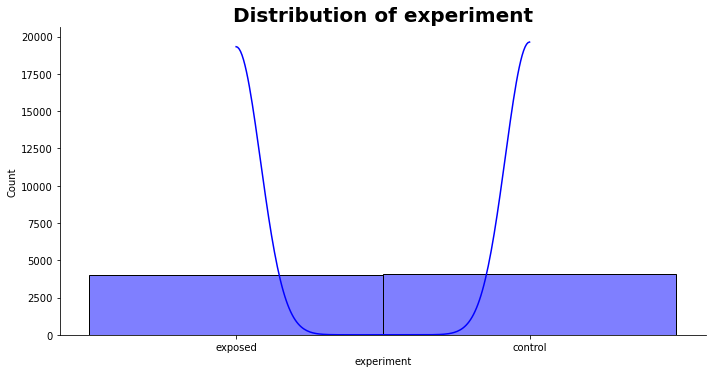

In [50]:
# histogram of 'experiment' column

VisualiseDf.plot_hist(raw,'experiment','blue')

Of the responses recorded, those who were in the control group (those who received a dummy ad) were slightly more than those in the exposed group (those who received a real ad).

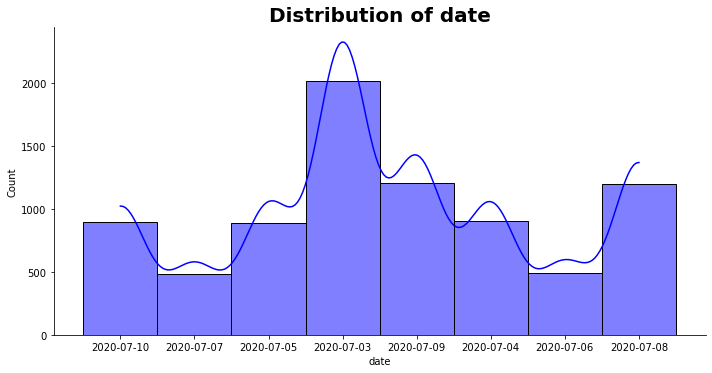

In [51]:
# histogram of 'date' column

VisualiseDf.plot_hist(raw,'date','blue')

This shows that the experiment was spread out over 8 days, with the 4th day(2020-07-03) recording the most responses. 

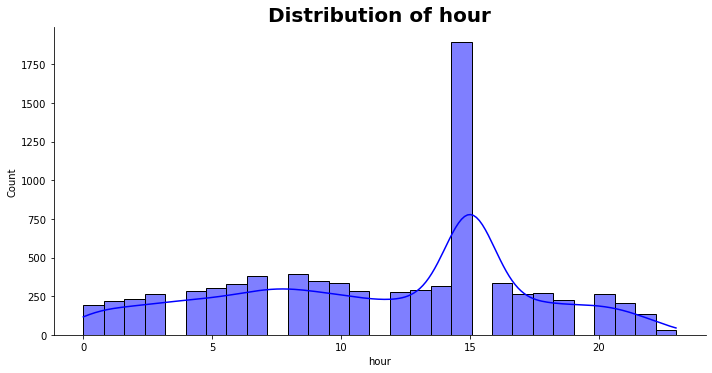

In [52]:
# histogram of 'hour' column

VisualiseDf.plot_hist(raw,'hour','blue')

Most of the experiments recorded responses during the 15th hour of the day (3pm).

In [15]:
# histogram of 'device_make' column
dfCopyn = dfCopy.head(5)
VisualiseDf.plot_hist(dfCopyn,'device_make','blue')

NameError: name 'dfCopy' is not defined

It looks like most of the participants(by far) were using the device make E5823.

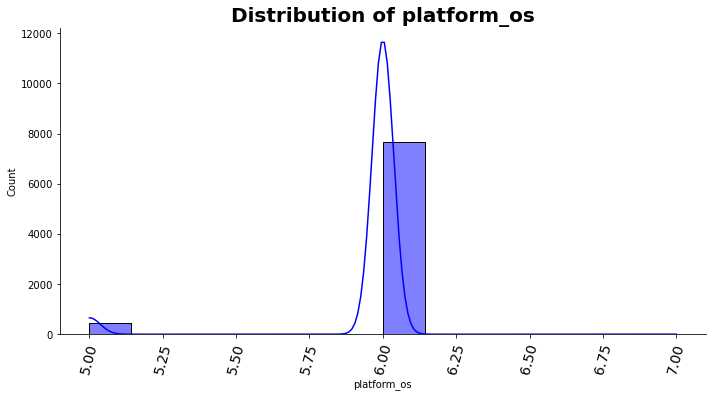

In [10]:
# histogram of 'platform_os' column

VisualiseDf.plot_hist(raw,'platform_os','blue')

This shows that most of the responses were recorded from platform_os 6 (android).

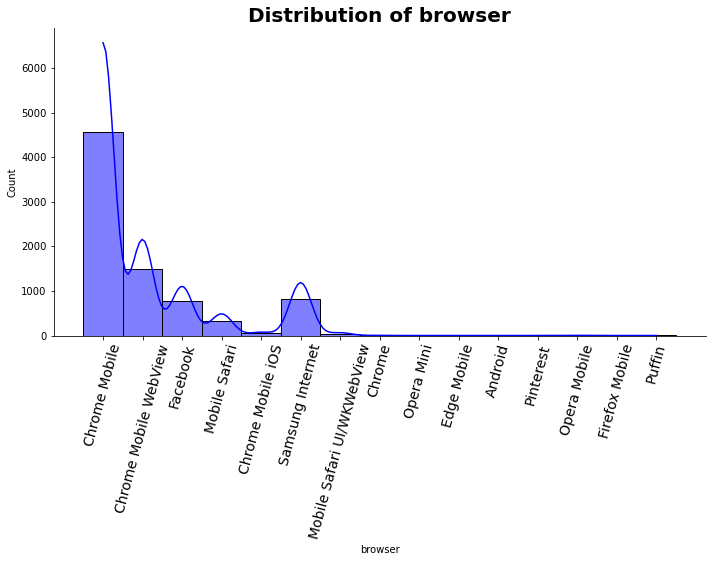

In [11]:
# histogram of 'browser' column

VisualiseDf.plot_hist(raw,'browser','blue')

Most of the participants (by more than double)  were using Chrome Mobile browser.

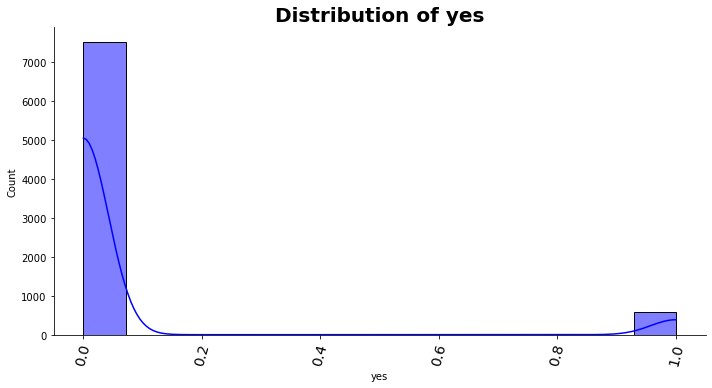

In [12]:
# histogram of 'yes' column

VisualiseDf.plot_hist(raw,'yes','blue')

This shows that the response "yes" was recorded for a very, very small proportion of the total users surveyed (less than 1000).

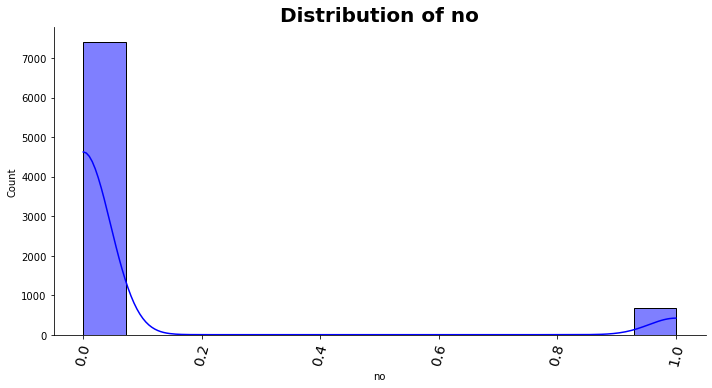

In [13]:
# histogram of 'no' column

VisualiseDf.plot_hist(raw,'no','blue')

This shows that the response "no" was recorded for a very, very small proportion of the total users surveyed (less than 1000)<br>
This means that there are a lot of rows for which the response recorded was 0 for both yes and no.<br><br>
We should remove these rows from the dataframe as they are not useful to our brand awareness analysis.

##### 2.2.1.a. Creating copy of raw data

In [36]:
# creating a copy of the raw data so that we're not working on the original 

raw_copy= raw.copy(deep=True)
raw_copy

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


##### 2.2.1.b. Removing rows which have zeroes in both the 'yes' and 'no' columns

In [37]:
# getting users who only selects yes or no, Since working on irresponive users wont be relevant

raw_copy = raw_copy[raw_copy['yes'] == 1].append(raw_copy[raw_copy['no'] == 1])
'''FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 
Use pandas.concat instead. '''
raw_copy

C:\Users\gwang\AppData\Local\Temp\ipykernel_13244\906429417.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  raw_copy = raw_copy[raw_copy['yes'] == 1].append(raw_copy[raw_copy['no'] == 1])


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0
...,...,...,...,...,...,...,...,...,...
8016,fd86fc6b-3420-4f81-9df0-98fa1f15abf5,exposed,2020-07-08,17,Samsung SM-G965F,6,Facebook,0,1
8058,ff95df43-63b4-48c8-8497-781ba7952eec,exposed,2020-07-09,18,Generic Smartphone,6,Chrome Mobile,0,1
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


##### 2.2.1.c. Plotting histograms again on the 'yes' and 'no' colums 

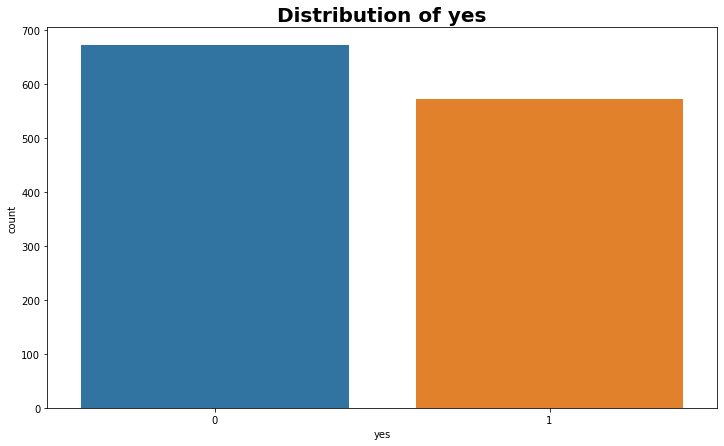

In [17]:
# histogram of 'yes' column

VisualiseDf.plot_count(raw_copy,'yes')

Same result as above but the histogram is a bit more legible. 

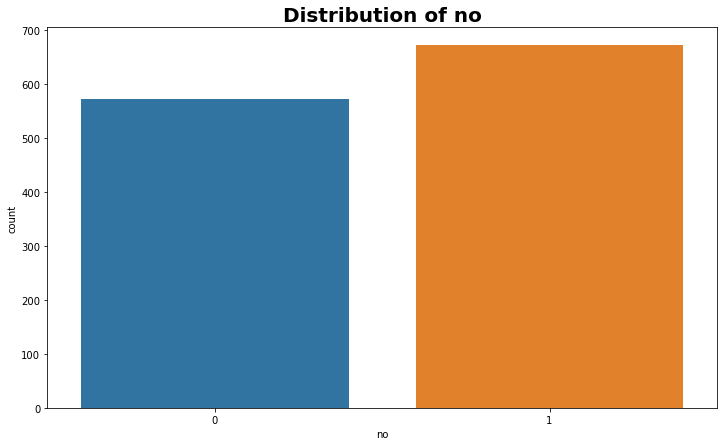

In [19]:
# histogram of 'no' column

VisualiseDf.plot_count(raw_copy,'no')

Same result as above but the histogram is a bit more legible. 

#### 2.2.2. Bar Graphs **or violin plot? or box plot? 

In [30]:
# plotting date vs hour

# VisualiseDf.plot_violin(raw_copy, 'browser', 'hour', 'yes', 'no')
# VisualiseDf.plot_violin(raw_copy, 'date', 'hour', 'date', 'hour')

In [41]:
# VisualiseDf.plot_violin(raw_copy, 'browser', 'hour', 'yes', 'no')
# VisualiseDf.plot_box(plot_box, raw_copy, 'browser', 'box plot of browser')

#### 2.2.3. Scatter Plots

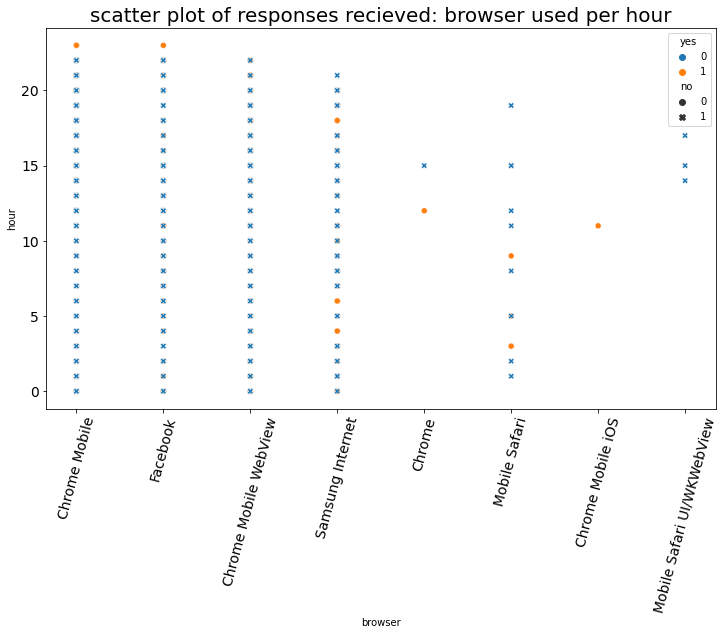

In [43]:
# plot scatter plot of 'browser' used per 'hour'

VisualiseDf.plot_scatter(raw_copy, 'browser', 'hour', 'scatter plot of responses recieved: browser used per hour', 'yes', 'no')

There are not that many "yes" responses received of the total responses recorded.<br><br>
The plots are a bit crowded so let's split the data into exposed and control to be able to tell the difference better.

##### 2.2.3.a. Creating copy of current data
(We're making a copy of the current data, the raw data with dropped rows)

In [46]:
# making copy of dataframe

newcopy = raw_copy.copy(deep=True)
newcopy.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


##### 2.2.3.b. Creating dataframe of those exposed to the ad


In [47]:
# creating the exposed group

exposed_df = newcopy[newcopy['experiment'] == 'exposed']
exposed_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0
128,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1,0
144,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1,0


In [48]:
exposed_df.shape

(657, 9)

##### 2.2.3.b. Creating dataframe of those NOT exposed to the ad, the control group


In [2]:
# creating the control group
control_df = newcopy[newcopy['experiment'] == 'control']
control_df.head(5)

NameError: name 'newcopy' is not defined

In [51]:
control_df.shape

(586, 9)

#### 2.2.3. Scatter Plots

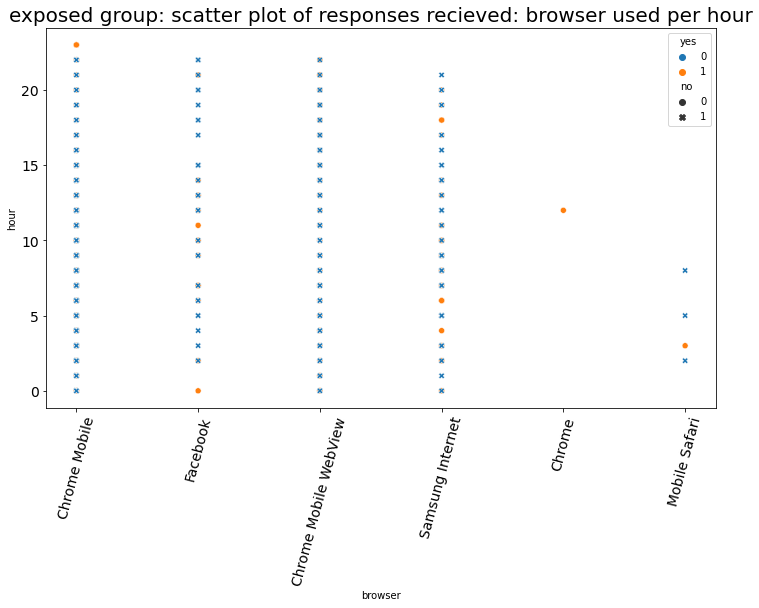

In [54]:
# plot scatter plot of 'browser' used per 'hour' for exposed group

VisualiseDf.plot_scatter(exposed_df, 'browser', 'hour', 'exposed group: scatter plot of responses recieved: browser used per hour', 'yes', 'no')

We have 8 responses which recorded yes (counting the yellow dots) from all the browsers.<br>
The Samsung Internet browser recorded the highest number of yes responses among the exposed group (5 responses).

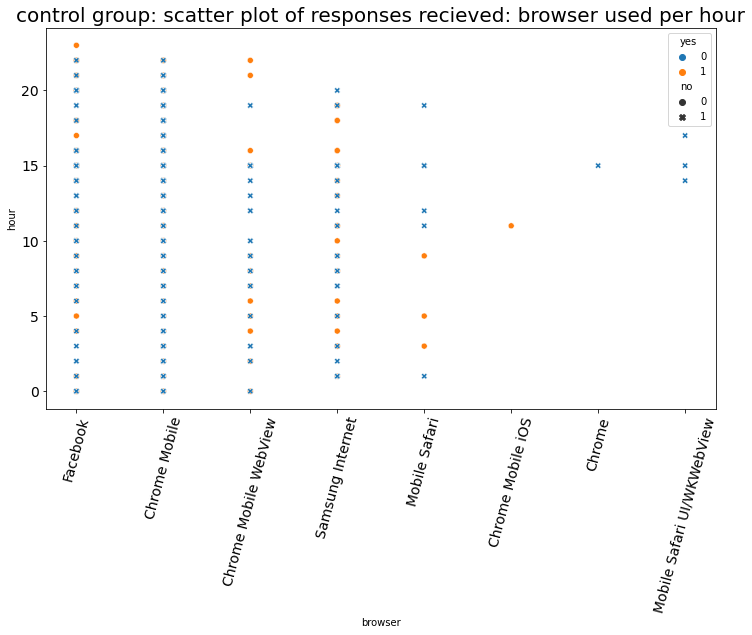

In [55]:
# plot scatter plot of 'browser' used per 'hour' for control group

VisualiseDf.plot_scatter(control_df, 'browser', 'hour', 'control group: scatter plot of responses recieved: browser used per hour', 'yes', 'no')

We have 17 responses which recorded yes (counting the yellow dots) from all the browsers.<br>
This is more than double the yes responses collected from among the exposed group.<br>
The Chrome Mobile WebView as well as the Samsung Internet browser recorded the highest number of yes responses among the control group (5 responses each).<br>

It seems that more users who were **not** exposed to the smart ads were aware of the brand "Lux".<br>
This implies that the smart ads did not work.